In [ ]:
import pandas as pd
import numpy as np
import sklearn
import csv
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

rs = 0

In [6]:
df = pd.read_csv("../data/npf_train.csv")
df.head()

,id,date,class4,partlybad,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,...,T672.mean,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std
0,1,2000-02-23,nonevent,False,380.528120,0.802001,380.371466,0.889550,381.816207,1.292593,...,-10.730843,1.381815,-10.282754,1.870056,8.356761,4.534937,0.178084,0.123402,0.002546,0.000686
1,2,2000-03-25,Ib,False,373.128684,1.096617,372.980000,1.047750,373.701830,1.259198,...,-2.095641,1.695622,-1.095864,2.090111,12.906779,7.022300,0.333523,0.239981,0.000662,0.000210
2,3,2000-04-06,Ib,False,372.363293,0.626329,372.245689,0.615803,372.847246,0.647279,...,0.991521,1.914186,1.846503,1.954748,14.286261,9.572444,0.418313,0.344386,0.000541,0.000072
3,4,2000-04-11,nonevent,False,381.437442,7.281159,381.380405,7.236002,381.926532,7.294374,...,1.753414,0.340565,2.524931,0.414255,4.945162,3.405652,0.224159,0.192014,0.003710,0.001209
4,5,2000-04-23,II,False,375.426310,3.264246,375.436524,3.110886,375.740215,3.274924,...,10.940107,2.179821,11.441893,3.048699,13.087014,9.771415,0.525591,0.476821,0.003680,0.002160


In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [8]:
df = df.drop(columns=["partlybad", "id"])

In [9]:
df['month'] = pd.DatetimeIndex(df['date']).month
df = df.drop(columns=["date"])
df.head()

,class4,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,CO2504.std,Glob.mean,Glob.std,H2O168.mean,H2O168.std,H2O336.mean,H2O336.std,H2O42.mean,H2O42.std,H2O504.mean,H2O504.std,H2O672.mean,H2O672.std,H2O84.mean,H2O84.std,NET.mean,NET.std,NO168.mean,NO168.std,NO336.mean,NO336.std,NO42.mean,NO42.std,NO504.mean,NO504.std,NO672.mean,NO672.std,NO84.mean,NO84.std,NOx168.mean,NOx168.std,NOx336.mean,NOx336.std,NOx42.mean,NOx42.std,NOx504.mean,NOx504.std,NOx672.mean,NOx672.std,NOx84.mean,NOx84.std,O3168.mean,O3168.std,O342.mean,O342.std,O3504.mean,O3504.std,O3672.mean,O3672.std,O384.mean,O384.std,Pamb0.mean,Pamb0.std,PAR.mean,PAR.std,PTG.mean,PTG.std,RGlob.mean,RGlob.std,RHIRGA168.mean,RHIRGA168.std,RHIRGA336.mean,RHIRGA336.std,RHIRGA42.mean,RHIRGA42.std,RHIRGA504.mean,RHIRGA504.std,RHIRGA672.mean,RHIRGA672.std,RHIRGA84.mean,RHIRGA84.std,RPAR.mean,RPAR.std,SO2168.mean,SO2168.std,SWS.mean,SWS.std,T168.mean,T168.std,T42.mean,T42.std,T504.mean,T504.std,T672.mean,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std,month
0,nonevent,380.528120,0.802001,380.371466,0.889550,381.816207,1.292593,380.296466,0.968884,236.605353,145.160571,2.663504,0.319427,2.695603,0.304894,2.548879,0.382813,2.694138,0.306606,2.771071,0.366386,2.613362,0.348996,81.699876,109.164607,0.319316,0.179649,0.336724,0.183974,0.235517,0.157543,0.332500,0.183478,0.287241,0.172559,0.286638,0.160141,2.657949,0.672278,2.650259,0.667324,2.621983,0.646127,2.642241,0.667192,2.609828,0.684998,2.645259,0.652994,32.624872,0.697921,31.269483,1.853033,32.866724,0.892441,32.675345,0.928274,32.235086,0.938220,1006.514940,0.217193,339.171515,211.125658,0.000964,0.007481,67.500843,30.529852,95.104103,1.612618,96.532586,2.382040,92.189052,1.781872,96.752672,2.326736,101.351071,4.571036,93.293534,1.981996,84.476919,49.764321,0.559316,0.374688,936.605263,0.916500,-10.272530,1.575415,-10.489828,2.085275,-10.346540,1.347401,-10.730843,1.381815,-10.282754,1.870056,8.356761,4.534937,0.178084,0.123402,0.002546,0.000686,2
1,Ib,373.128684,1.096617,372.980000,1.047750,373.701830,1.259198,372.910000,1.004164,252.480327,138.921953,3.253684,0.299728,3.232222,0.308108,3.299150,0.290206,3.228039,0.310416,3.227712,0.307517,3.267582,0.298119,142.534162,115.885107,0.023618,0.040306,0.028105,0.042142,0.025294,0.045379,0.027908,0.046759,0.030458,0.042894,0.025425,0.094298,0.843355,0.159896,0.829739,0.157876,0.914641,0.574305,0.824510,0.162646,0.833987,0.174832,0.864379,0.229341,47.953553,3.039311,47.584248,3.272690,48.135098,2.780791,48.196993,2.678606,47.717712,3.193208,992.994188,0.280526,487.596401,268.860550,-0.005340,0.008779,41.090445,21.317089,59.672237,14.625643,60.119150,14.369137,59.535033,15.592649,60.910915,14.122225,62.475294,14.217269,59.184771,15.260717,32.421126,19.516104,0.138289,0.115293,923.450980,2.062171,-1.330589,1.947330,-1.037435,2.231552,-1.738455,1.748079,-2.095641,1.695622,-1.095864,2.090111,12.906779,7.022300,0.333523,0.239981,0.000662,0.000210,3
2,Ib,372.363293,0.626329,372.245689,0.615803,372.847246,0.647279,372.193952,0.596289,269.981547,200.826676,4.459042,0.367894,4.422874,0.365105,4.509760,0.360563,4.409401,0.359296,4.395988,0.357929,4.462515,0.362899,156.409709,173.191387,0.030898,0.047893,0.030000,0.046062,0.028802,0.047107,0.024910,0.045468,0.029940,0.052406,0.028802,0.050870,0.747545,0.207766,0.736407,0.174350,0.775150,0.254238,0.705210,0.156536,0.709701,0.152953,0.771078,0.245791,45.974192,1.892847,45.661317,1.922014,46.141737,1.895122,46.116168,1.889977,45.854731,1.943906,986.740455,2.777462,515.622611,392.245819,-0.002910,0.006699,41.006814,29.483793,65.047844,13.978114,65.240539,14.181466,64.822395,13.827617,65.872216,14.174827,67.481018,14.652811,64.301856,13.820666,32.940216,25.385709,0.107066,0.122741,923.410714,2.647653,1.672108,1.942941,1.893257,1.960102,1.354012,1.910314,0.991521,1.914186,1.846503,1.954748,14.286261,9.572444,0.418313,0.344386,0.000541,0.000072,4
3,nonevent,381.437442,7.281159,381.380405,7.

In [10]:
df["class2"] = df["class4"].apply(lambda x: 0 if x == "nonevent" else 1)

In [11]:
def accuracy(y_pred, y_test):
    correct = 0
    total = len(y_pred)

    for i in range(0, total):
        if y_pred[i] == y_test[i]:
            correct += 1

    return(correct / total) 

In [12]:
def get_X_with_K_features(X, y, k):
    X_new = SelectKBest(f_classif, k=k).fit_transform(X,y)
    return(X_new)

In [8]:
## Multi-class random forest

y = np.array(df["class4"])
X = np.array(df.drop(columns=["class4", "class2"]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = rs)

rf = RandomForestClassifier(n_estimators = 1000, random_state = rs)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy(y_pred, y_test)

0.6759259259259259

In [9]:
## Single-class random forest

y = np.array(df["class2"])
X = np.array(df.drop(columns=["class4", "class2"]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = rs)

rf = RandomForestClassifier(n_estimators = 1000, random_state = rs)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy(y_pred, y_test)

0.8425925925925926

In [4]:
# Logistic regression
y = np.array(df["class2"])
X = np.array(df.drop(columns=["class4", "class2", "month"]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = rs)

lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
acc = lr.score(X_test, y_test)
acc

NameError: name 'df' is not defined

In [47]:
# Multinomial logistic regression
y = np.array(df["class4"])
X = np.array(df.drop(columns=["class4", "class2", "month"]))

param_grid = {
        'penalty': ['l1', 'l2'],
        'C' : np.logspace(-4, 4, 20),
        'multi_class': ['multinomial'],
        'solver': ['saga', 'lbfgs'],
        'max_iter': [10000]
}

models = []

for k in range(45, 101, 5):
    X_new = get_X_with_K_features(X, y, k)
    lrm = LogisticRegression()
    lrm_cv = GridSearchCV(lrm, param_grid, cv=StratifiedKFold(n_splits=10, random_state=rs), n_jobs=-1)
    lrm_cv.fit(X_new, y)
    
    models.append(lrm_cv)

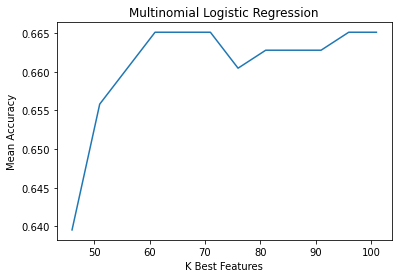

In [48]:
scores = []

for m in models:
    scores.append(m.best_score_)

plt.title("Multinomial Logistic Regression")
plt.xlabel("K Best Features")
plt.ylabel("Mean Accuracy")

plt.plot(list(range(46, 102, 5)), scores)

In [49]:
models[len(models) - 1].best_params_



{'C': 0.012742749857031334,
 'max_iter': 10000,
 'multi_class': 'multinomial',
 'penalty': 'l2',
 'solver': 'lbfgs'}

In [50]:
y = np.array(df["class4"])
X = np.array(df.drop(columns=["class4", "class2", "month"]))

lrm = LogisticRegression(
    C = 0.012742749857031334,
    max_iter = 10000,
    multi_class = 'multinomial',
    penalty = 'l2',
    solver = 'lbfgs')

lrm.fit(X, y)

LogisticRegression(C=0.012742749857031334, max_iter=10000,
                   multi_class='multinomial')

In [74]:
# binary accuracy from the multiclass model

preds = lrm.predict(X)

correct = 0
for i in range(0, len(preds)):
    if (preds[i] == 'nonevent' and y[i] == 'nonevent') or (preds[i] != 'nonevent' and y[i] != 'nonevent'):
        correct += 1

acc = correct / len(preds)

In [75]:
acc_rounded = round(acc, 3)
acc_rounded

0.886

In [51]:
# Predict class4 by getting the majority class from the training data
# Filter the nonevents from the array, then count unique events and return one that has most counts
classes = np.array(df["class4"])
events = np.where(classes != 'nonevent')
(values,counts) = np.unique(classes[events],return_counts=True)
ind=np.argmax(counts)
class4_pred = values[ind]
class4_pred

'II'

In [52]:
# Import hidden data
df_hidden = pd.read_csv("../data/npf_test_hidden.csv")

df_hidden = df_hidden.drop(columns=["partlybad", "id", "date"])

df_hidden.head()

,class4,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,CO2504.std,Glob.mean,Glob.std,H2O168.mean,H2O168.std,H2O336.mean,H2O336.std,H2O42.mean,H2O42.std,H2O504.mean,H2O504.std,H2O672.mean,H2O672.std,H2O84.mean,H2O84.std,NET.mean,NET.std,NO168.mean,NO168.std,NO336.mean,NO336.std,NO42.mean,NO42.std,NO504.mean,NO504.std,NO672.mean,NO672.std,NO84.mean,NO84.std,NOx168.mean,NOx168.std,NOx336.mean,NOx336.std,NOx42.mean,NOx42.std,NOx504.mean,NOx504.std,NOx672.mean,NOx672.std,NOx84.mean,NOx84.std,O3168.mean,O3168.std,O342.mean,O342.std,O3504.mean,O3504.std,O3672.mean,O3672.std,O384.mean,O384.std,Pamb0.mean,Pamb0.std,PAR.mean,PAR.std,PTG.mean,PTG.std,RGlob.mean,RGlob.std,RHIRGA168.mean,RHIRGA168.std,RHIRGA336.mean,RHIRGA336.std,RHIRGA42.mean,RHIRGA42.std,RHIRGA504.mean,RHIRGA504.std,RHIRGA672.mean,RHIRGA672.std,RHIRGA84.mean,RHIRGA84.std,RPAR.mean,RPAR.std,SO2168.mean,SO2168.std,SWS.mean,SWS.std,T168.mean,T168.std,T42.mean,T42.std,T504.mean,T504.std,T672.mean,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std
0,NaN,377.448880,2.920241,377.632640,2.666835,377.908080,3.440430,377.708240,2.543418,210.851946,179.668211,13.516160,0.503071,13.448640,0.496249,13.674790,0.530696,13.394640,0.498479,13.363040,0.497949,13.594444,0.521267,150.196036,150.388580,0.027333,0.059314,0.025333,0.060505,0.013309,0.055271,0.026444,0.060477,0.031630,0.059778,0.012059,0.059952,0.717778,0.244802,0.722667,0.243535,0.703088,0.269602,0.717111,0.261054,0.716741,0.243721,0.692132,0.241236,48.873185,5.682168,47.631912,6.032602,49.573037,5.501992,49.893185,5.448881,48.160074,5.871296,994.642956,0.596543,462.288867,395.186100,-0.002204,0.004148,27.684027,24.408845,61.929200,8.972139,62.429200,9.055263,62.922101,9.302637,62.818960,9.081988,63.571440,9.160430,62.301746,9.121943,16.461909,14.679380,0.462741,0.196812,911.833333,24.361855,19.019520,2.306049,19.033461,2.316664,18.649187,2.278480,18.421232,2.267065,19.059027,2.320316,12.572064,9.623161,0.645959,0.558320,0.006159,0.000797
1,NaN,369.589091,0.210402,369.632955,0.201409,369.904200,0.252167,369.601600,0.184727,25.017625,15.296680,4.339091,0.035360,4.307045,0.037203,4.376000,0.045535,4.299600,0.034639,4.290400,0.033317,4.334400,0.040816,2.613875,15.499577,0.003396,0.036052,0.016481,0.037121,0.012642,0.075706,0.008519,0.036879,0.018679,0.046162,0.006226,0.049077,0.795849,0.095463,0.797222,0.082472,0.842642,0.453924,0.796667,0.082279,0.804528,0.081372,0.854906,0.382052,34.074528,0.240820,33.866792,0.399186,34.362593,0.266205,34.490566,0.224957,34.050755,0.300217,982.955438,0.709056,46.884312,26.235043,0.000000,0.000000,4.799594,3.225846,67.663636,1.291898,68.085682,1.441290,68.073200,1.258270,68.340600,1.344173,69.213400,1.354032,67.448000,1.359301,3.155625,2.131279,0.026038,0.061530,922.333333,0.577350,0.462844,0.194671,0.480250,0.195631,0.178000,0.185177,-0.036312,0.180361,0.476219,0.192571,1.479447,0.640776,0.028665,0.013506,0.000361,0.000031
2,NaN,380.338929,0.928028,380.315833,0.917636,380.550119,0.936683,380.301446,0.916970,8.283964,5.107894,6.543333,0.191992,6.497143,0.197768,6.629167,0.184255,6.479639,0.198681,6.528193,0.204993,6.592143,0.181520,11.419841,4.875628,0.009524,0.026155,0.007500,0.027060,0.013810,0.027061,0.011084,0.027542,0.006988,0.023098,0.011429,0.026304,0.945000,0.183510,0.954405,0.181336,0.927976,0.169512,0.955181,0.175655,0.962169,0.180589,0.935476,0.183417,22.213571,2.388679,21.710119,2.340238,22.492410,2.370442,22.735422,2.415880,21.941548,2.393011,980.814880,0.279318,18.128247,11.574338,0.000000,0.000000,0.065139,0.646427,92.853214,0.804013,93.415238,0.760399,93.546786,0.760492,93.668072,0.758113,95.544337,1.356642,93.334524,0.738239,0.028685,0.212517,0.112143,0.100697,770.735294,142.420698,1.705657,0.363461,1.790637,0.364509,1.453287,0.372461,1.284980,0.379219,1.737849,0.365878,0.720849,0.427279,0.015179,0.010471,0.002334,0.000347
3,NaN,381.047644,1.290080,381.231149,1.245494,381.358678,1.817869,381.290057,1.228278,380.881093,2

In [53]:
# Create predictions for hidden data
X_hidden = np.array(df_hidden.drop(columns=["class4"]))
y_pred_hidden = lrm.predict(X_hidden)
y_pred_hidden

array(['nonevent', 'Ia', 'nonevent', 'Ib', 'nonevent', 'Ib', 'II', 'II',
       'nonevent', 'Ib', 'Ib', 'II', 'II', 'II', 'II', 'II', 'II',
       'nonevent', 'nonevent', 'II', 'II', 'Ib', 'II', 'nonevent', 'Ib',
       'Ib', 'nonevent', 'nonevent', 'nonevent', 'nonevent', 'Ib', 'II',
       'nonevent', 'II', 'nonevent', 'nonevent', 'nonevent', 'Ib',
       'nonevent', 'nonevent', 'II', 'nonevent', 'nonevent', 'nonevent',
       'nonevent', 'II', 'nonevent', 'Ib', 'Ib', 'II', 'nonevent',
       'nonevent', 'nonevent', 'nonevent', 'nonevent', 'nonevent', 'II',
       'II', 'nonevent', 'II', 'Ib', 'nonevent', 'II', 'nonevent',
       'nonevent', 'Ib', 'Ib', 'Ib', 'II', 'nonevent', 'Ia', 'nonevent',
       'nonevent', 'nonevent', 'nonevent', 'nonevent', 'nonevent',
       'nonevent', 'nonevent', 'II', 'Ib', 'II', 'nonevent', 'II', 'II',
       'II', 'II', 'II', 'II', 'nonevent', 'nonevent', 'nonevent', 'II',
       'II', 'nonevent', 'II', 'nonevent', 'II', 'nonevent', 'nonevent',
       '

In [54]:
# Predict probabilities for the classes

y_proba_hidden = lrm.predict_proba(X_hidden)
y_proba_hidden[0:5]

array([[7.38036379e-02, 1.92696709e-05, 1.38908144e-02, 9.12286278e-01],
       [1.36029425e-01, 5.37345859e-01, 5.09018331e-02, 2.75722883e-01],
       [4.81701703e-04, 2.91778994e-11, 4.89686960e-05, 9.99469330e-01],
       [3.57319623e-01, 7.10753527e-02, 5.58471989e-01, 1.31330353e-02],
       [7.05942135e-02, 2.38107316e-02, 6.19912824e-02, 8.43603773e-01]])

In [56]:
lrm.classes_

array(['II', 'Ia', 'Ib', 'nonevent'], dtype=object)

In [60]:
# class indices based on the order of the classes in model above

classes = {"II": 0, "Ia": 1, "Ib": 2, "nonevent": 3}

In [61]:
# Create the prediction data for answer

results = []

for i in range(len(y_pred_hidden)):
    pred = y_pred_hidden[i]
    results.append([pred, round(y_proba_hidden[i][classes[pred]], 4)])

In [62]:
# Check that the data looks ok
results[0:20]

[['nonevent', 0.9123],
 ['Ia', 0.5373],
 ['nonevent', 0.9995],
 ['Ib', 0.5585],
 ['nonevent', 0.8436],
 ['Ib', 0.3949],
 ['II', 0.4906],
 ['II', 0.6009],
 ['nonevent', 0.429],
 ['Ib', 0.4881],
 ['Ib', 0.4988],
 ['II', 0.7362],
 ['II', 0.3969],
 ['II', 0.6555],
 ['II', 0.5352],
 ['II', 0.4986],
 ['II', 0.8061],
 ['nonevent', 0.9828],
 ['nonevent', 0.9925],
 ['II', 0.8631]]

In [76]:
# Create the answers.csv file

with open('../data/answers.csv', 'w', newline='') as answers:
    wr = csv.writer(answers, quoting=csv.QUOTE_ALL)
    # First line is the predicted accuracy
    wr.writerow([acc_rounded])
    # class4,p
    wr.writerow(['class4','p'])
    # Class4, prediction for every instance
    for i in range(len(results)):
        wr.writerow(results[i])

In [79]:
# Support Vector Machine
y = np.array(df["class2"])
X = np.array(df.drop(columns=["class4", "class2"]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = rs)

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))

[[46 10]
 [ 8 44]]


In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        56
           1       0.81      0.85      0.83        52

    accuracy                           0.83       108
   macro avg       0.83      0.83      0.83       108
weighted avg       0.83      0.83      0.83       108



In [81]:
accuracy(y_pred, y_test)

0.8333333333333334